# Introduction to Machine Learning

## High School of Digital Culture

## Additional Materials to Module 3. Logistic Regression

In [5]:
conda install pandas numpy matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gto_n\anaconda3\envs\Python

  added / updated specs:
    - matplotlib
    - numpy
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.4           |  py310h9128911_0         109 KB
    kiwisolver-1.4.2           |  py310hd77b12b_0          58 KB
    matplotlib-3.5.1           |  py310haa95532_1          29 KB
    matplotlib-base-3.5.1      |  py310hd77b12b_1         5.6 MB
    mkl-service-2.4.0          |  py310h2bbff1b_0          48 KB
    mkl_fft-1.3.1              |  py310ha0764ea_0         136 KB
    mkl_random-1.2.2           |  py310h4ed8f06_0         221 KB
    numexpr-2.8.1              |  py310hb57aa6b_1         115 KB
    numpy-1.22.3               |  py310h6d2d95c_0          25 KB
    numpy-base-1.22.3          |  py310h206c741_0         4.9 MB
    pandas-1.4

Data processing

In [6]:
#Data reading; unique names of candies will be indexes
import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [10]:
#Feeding the model with data (except for some candies)
train_data = DATA.drop(['winpercent'], axis=1)
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,1


In [11]:
train_data = train_data.drop(['Boston Baked Beans', 'Dum Dums', 'Fruit Chews'])
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,1


In [12]:
#Selecting the response column
y = pd.DataFrame(train_data['Y'])
y

,Y
competitorname,
100 Grand,1
3 Musketeers,1
One dime,0
One quarter,0
Air Heads,1
...,...
Snickers Crisper,1
Sour Patch Kids,1
Sour Patch Tricksters,1


In [13]:
x = train_data.drop(['Y'], axis=1)
x

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116


Logistic regression model training

In [14]:
#Connecting the logistic regression model from sklearn library
from sklearn.linear_model import LogisticRegression

In [15]:
#Model training
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(x, y.values.ravel())

In [18]:
test = pd.read_csv('candy-test.csv')
test

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0
6,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0
7,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1
8,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0
9,Twix,0,1,0,0,0,0,0,0,0,0.735430,0.86634,1


In [29]:
test[test['competitorname'] == 'Tootsie Roll Midgies'].iloc[:, 1:-1]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
6,1,0,0,0,0,0,0,0,1,0.174,0.011


Prediction for the candies using the trained model

In [30]:
#Prediction for the candies entered manually, probabilities are given for classes 0 and 1 respectively
reg.predict_proba(test[test['competitorname'] == 'Tootsie Roll Midgies'].iloc[:, 1:-1])

array([[0.31708781, 0.68291219]])

In [31]:
reg.predict_proba(test[test['competitorname'] == 'Trolli Sour Bites'].iloc[:, 1:-1])

array([[0.6199793, 0.3800207]])

In [35]:
#Connecting the metrics from sklearn library
from sklearn import metrics

In [33]:
pred = reg.predict(test.iloc[:, 1:-1])
true = test.iloc[:, -1:]

In [36]:
#calculate FPR, TPR
fpr, tpr, _ = metrics.roc_curve(true, pred)

In [42]:
#calculate AUC
metrics.roc_auc_score(true, pred)

0.6499999999999999

In [37]:
#calculation Recall
metrics.recall_score(true, pred)

0.6

In [39]:
#calculation Precision
metrics.precision_score(true, pred)

0.5

In [23]:
#enabling libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gto_n\anaconda3\envs\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


NameError: name 'plt' is not defined

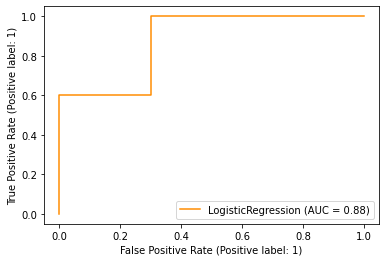

In [43]:
metrics.plot_roc_curve(reg, test.iloc[:, 1:-1], true, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()